# K Nearest Neighbors (KNN):

In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [6]:
# Load Iris Dataset
data = load_iris()
X = data.data
y = data.target

# Split the dataset into training ans teasting sets
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Create a k-NN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [9]:
# Predict the test set
y_pred = knn.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print(classification_report(y_test, y_pred, target_names=data.target_names))


Accuracy: 1.00
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Deciosion Trees

In [12]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Create Decision Trees:
DT = DecisionTreeClassifier(random_state=42)

# Train the model
DT.fit(X_train, y_train)

# Make the predictions
y_pred = DT.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


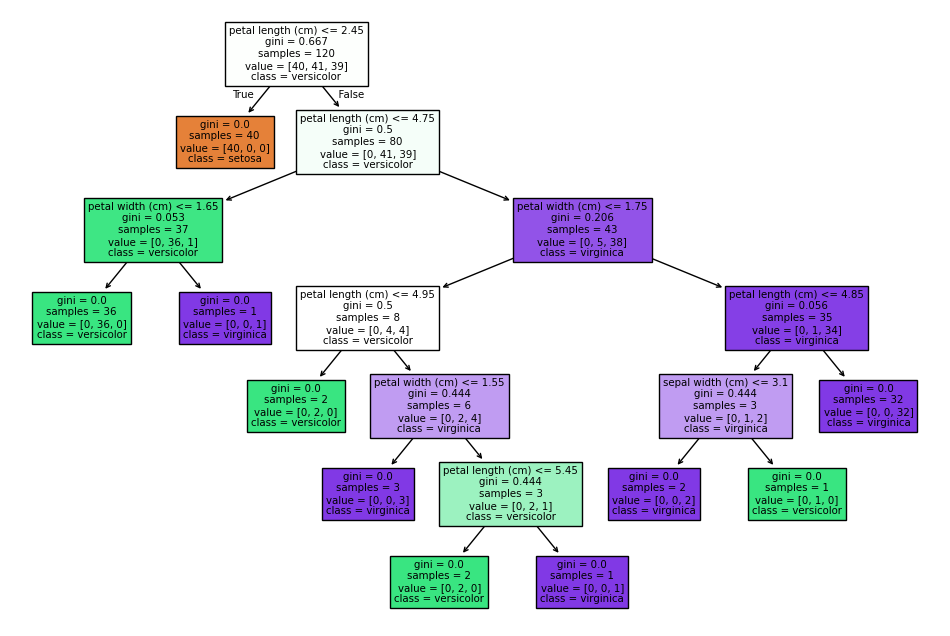

In [14]:
# Plot the tree
plt.figure(figsize=(12, 8))
plot_tree(DT, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.show()


# Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Create Decision Trees:
RF = RandomForestClassifier(random_state=42)

# Train the model
RF.fit(X_train, y_train)

# Make the predictions
y_pred = RF.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


             Feature  Importance
2  petal length (cm)    0.439994
3   petal width (cm)    0.421522
0  sepal length (cm)    0.108098
1   sepal width (cm)    0.030387


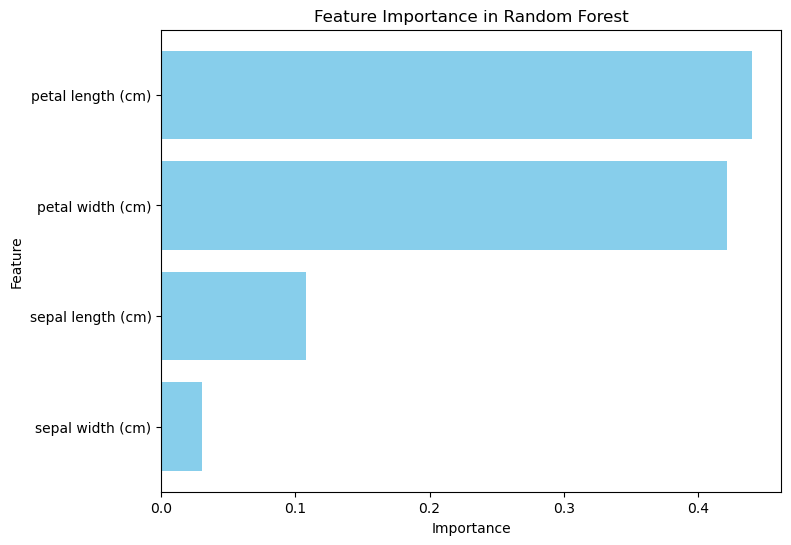

In [17]:
# Feature importance
importances = RF.feature_importances_
feature_names = data.feature_names
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Print feature importance
print(importance_df)

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.gca().invert_yaxis()
plt.show()


# AdaBoost:

In [19]:
from sklearn.ensemble import AdaBoostClassifier

# Create a base weak learner (decision stump)
base_learner = DecisionTreeClassifier(max_depth=1)

# Create the AdaBoost Classifier with the weak learner
adaboost = AdaBoostClassifier(estimator=base_learner, n_estimators=50, learning_rate=1, random_state=42)

# Train the AdaBoost Classifier
adaboost.fit(X_train, y_train)

# Predict on the test set
y_pred = adaboost.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


/opt/miniconda3/envs/mv00/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


             Feature  Importance
2  petal length (cm)         0.5
3   petal width (cm)         0.5
0  sepal length (cm)         0.0
1   sepal width (cm)         0.0


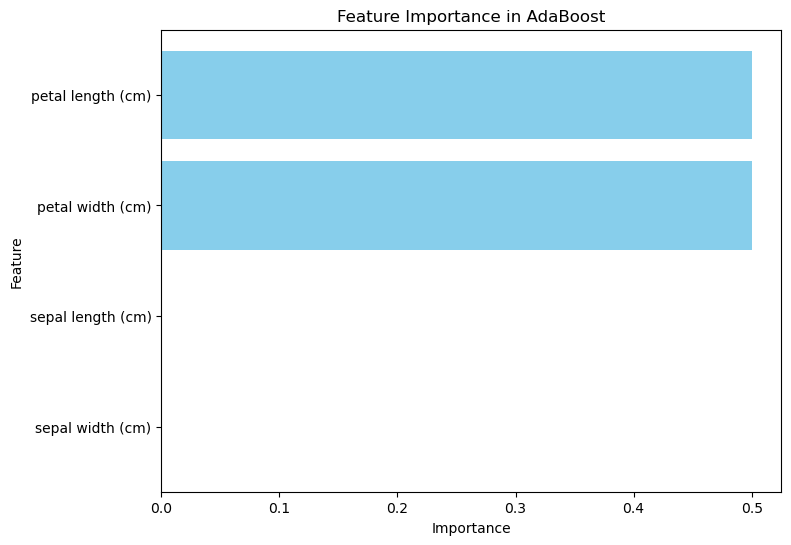

In [20]:
# Feature importance
importances = adaboost.feature_importances_
feature_names = data.feature_names
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Print feature importance
print(importance_df)

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in AdaBoost')
plt.gca().invert_yaxis()
plt.show()
